# Customer Segmentation Analysis – E-Commerce

Sections in the Notebook:
Introduction

Importing Libraries

Loading and Exploring the Dataset

Data Cleaning

Feature Engineering

Descriptive Statistics and EDA

Customer Segmentation using K-Means

Cluster Visualization

Cluster Insights and Business Recommendations

Conclusion



In [13]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Loading and Exploring the Dataset
df = pd.read_csv("ifood_df.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (2205, 39)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [16]:
#Data Cleaning
# Dropping constant columns
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

In [17]:
# Checking for null values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpOverall      0
dtype: int64


In [18]:
# Feature Engineering
# Creating TotalChildren and TotalPurchases features
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']
df['TotalPurchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

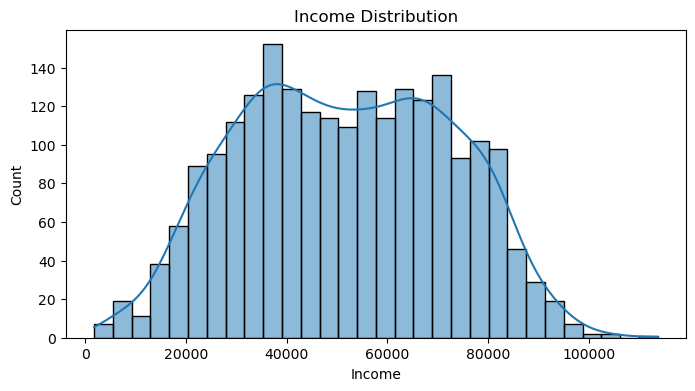

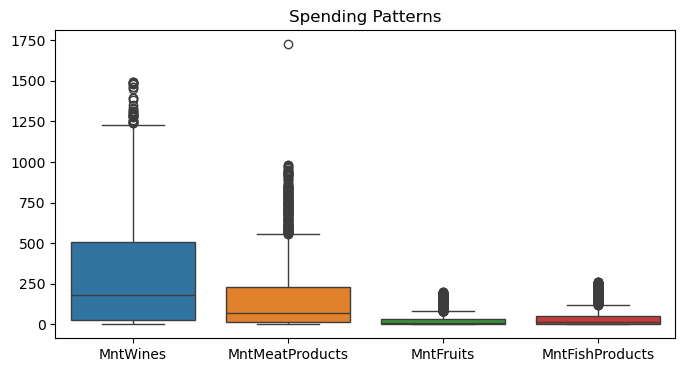

In [20]:
# Descriptive Statistics and EDA
# Plotting distributions
plt.figure(figsize=(8,4))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title("Income Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(data=df[['MntWines','MntMeatProducts','MntFruits','MntFishProducts']])
plt.title("Spending Patterns")
plt.show()

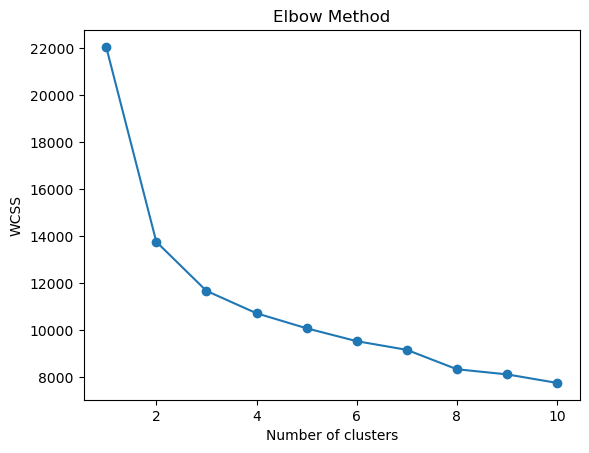

In [22]:
#  Customer Segmentation using K-Means
# Selecting features for clustering
features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'TotalPurchases', 'NumDealsPurchases']

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


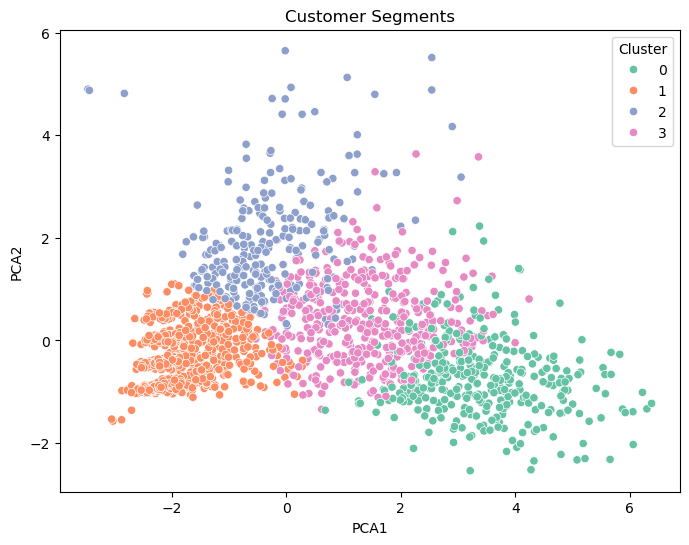

In [23]:
#  Cluster Visualization
# Using PCA for 2D plot
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:,0]
df['PCA2'] = components[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Customer Segments")
plt.show()